In [1]:
import pandas as pd
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

In [2]:
# import de l'échantillon et des informations relatives aux cours
data = pd.read_csv('bag_of_words.csv', index_col = 0)
courses_info = pd.read_csv('courses_info.csv',index_col = 0)

# Theme du ou des parcours auxquels appartient le cours (data, developpement, marketing, etc.)
theme = [courses_info.loc[course_id, "theme"] for course_id in data.index]

# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

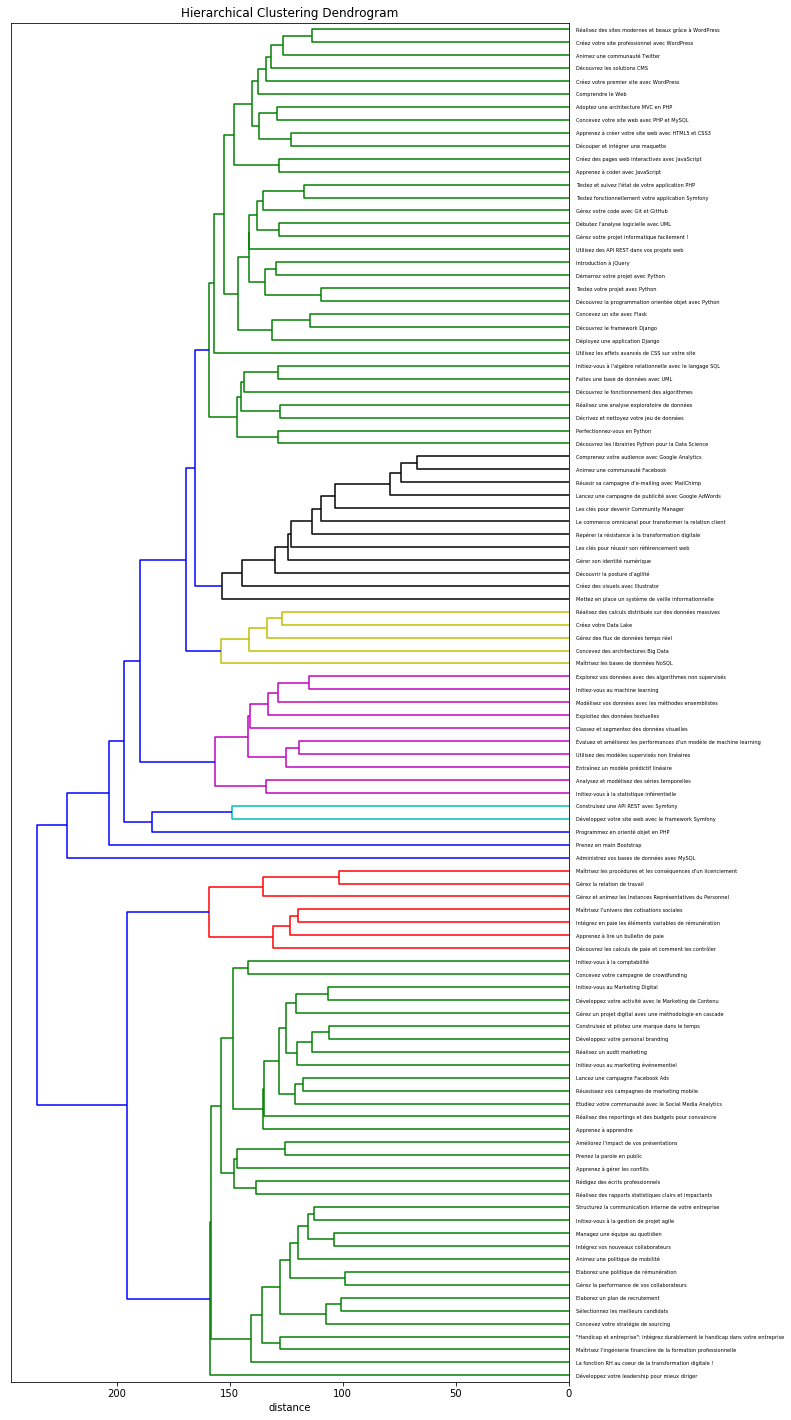

In [3]:
# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)


In [4]:
# Coupage du dendrogramme en 12 clusters
clusters = fcluster(Z, 12, criterion='maxclust')
#clusters = fcluster(Z, 159, criterion='distance') # ligne équivalente à la précédente

In [5]:
# Comparaison des clusters trouvés avec les classification des cours en différents thèmes
courses = pd.DataFrame({"theme": theme, "cluster": clusters, "title": names})
print(courses.pivot_table(index="theme", columns="cluster", aggfunc=len, fill_value=0))

               title                                   
cluster           1  2  3  4  5   6  7  8  9   10 11 12
theme                                                  
RH                14  4  3  0  0   0  0  2  0   0  0  0
RH & marketing     6  0  0  0  0   0  0  3  0   1  0  0
data               1  0  0  0  0  10  5  0  4   0  0  0
dev                0  0  0  2  1   0  0  0  3  18  1  1
marketing         10  0  0  0  0   0  0  6  0   2  0  0
multi-parcours     2  0  0  0  0   0  0  1  0   5  0  0
